In [202]:
import random
random.seed(15250457)

In [203]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as stats
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
import autograd.numpy as numpy
from autograd import grad
from autograd import elementwise_grad
import graphviz
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import prince
from prince import FAMD
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [204]:
data = pd.read_csv("musicData.csv")
dataNumerical = pd.read_csv("musicData.csv")

data = data.drop(['instance_id','artist_name','track_name','obtained_date'], axis=1)
dataNumerical = dataNumerical.drop(['instance_id','artist_name','track_name','obtained_date'], axis=1)

dataNumerical['music_genre'].replace(['Electronic','Anime','Jazz','Alternative','Country',
                             'Rap','Blues','Rock','Classical','Hip-Hop'],[0,1,2,3,4,5,6,7,8,9], inplace=True)

one_hot = pd.get_dummies(data['mode'], prefix='Mode', drop_first=True)
one_hotNumerical = pd.get_dummies(dataNumerical['mode'], prefix='Mode', drop_first=True)

data = data.drop(['mode'], axis=1)
dataNumerical = dataNumerical.drop(['mode'], axis=1)

data = pd.concat([data,one_hot], axis=1)
dataNumerical = pd.concat([dataNumerical,one_hotNumerical], axis=1)

one_hotKey = pd.get_dummies(data['key'], prefix='Key', drop_first=True)
one_hotKeyNumerical = pd.get_dummies(dataNumerical['key'], prefix='Key', drop_first=True)

data = data.drop(['key'], axis=1)
dataNumerical = dataNumerical.drop(['key'], axis=1)

data = pd.concat([data,one_hotKey], axis=1)
dataNumerical = pd.concat([dataNumerical,one_hotKeyNumerical], axis=1)

data = data.dropna(how='any')
data = data[data.duration_ms != -1.0]
data = data[data.tempo != '?']
dataNumerical = dataNumerical.dropna(how='any')
dataNumerical = dataNumerical[dataNumerical.duration_ms != -1.0]
dataNumerical = dataNumerical[dataNumerical.tempo != '?']

music_label = 'music_genre'
genres = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']

#print(data)
#print(dataNumerical)

electronicDataNumerical = dataNumerical[dataNumerical.music_genre == 0]
animeDataNumerical = dataNumerical[dataNumerical.music_genre == 1]
jazzDataNumerical = dataNumerical[dataNumerical.music_genre == 2]
alternativeDataNumerical = dataNumerical[dataNumerical.music_genre == 3]
countryDataNumerical = dataNumerical[dataNumerical.music_genre == 4]
rapDataNumerical = dataNumerical[dataNumerical.music_genre == 5]
bluesDataNumerical = dataNumerical[dataNumerical.music_genre == 6]
rockDataNumerical = dataNumerical[dataNumerical.music_genre == 7]
classicalDataNumerical = dataNumerical[dataNumerical.music_genre == 8]
hiphopDataNumerical = dataNumerical[dataNumerical.music_genre == 9]

electronicData = data[data.music_genre == 'Electronic']
animeData = data[data.music_genre == 'Anime']
jazzData = data[data.music_genre == 'Jazz']
alternativeData = data[data.music_genre == 'Alternative']
countryData = data[data.music_genre == 'Country']
rapData = data[data.music_genre == 'Rap']
bluesData = data[data.music_genre == 'Blues']
rockData = data[data.music_genre == 'Rock']
classicalData = data[data.music_genre == 'Classical']
hiphopData = data[data.music_genre == 'Hip-Hop']

In [205]:
electronicTrain, electronicTest = model_selection.train_test_split(electronicData, test_size=500, random_state=42)
electronicTrainNumerical, electronicTestNumerical = model_selection.train_test_split(electronicDataNumerical, test_size=500, random_state=42)

animeTrain, animeTest = model_selection.train_test_split(animeData, test_size=500, random_state=42)
animeTrainNumerical, animeTestNumerical = model_selection.train_test_split(animeDataNumerical, test_size=500, random_state=42)

jazzTrain, jazzTest = model_selection.train_test_split(jazzData, test_size=500, random_state=42)
jazzTrainNumerical, jazzTestNumerical = model_selection.train_test_split(jazzDataNumerical, test_size=500, random_state=42)

alternativeTrain, alternativeTest = model_selection.train_test_split(alternativeData, test_size=500, random_state=42)
alternativeTrainNumerical, alternativeTestNumerical = model_selection.train_test_split(alternativeDataNumerical, test_size=500, random_state=42)

countryTrain, countryTest = model_selection.train_test_split(countryData, test_size=500, random_state=42)
countryTrainNumerical, countryTestNumerical = model_selection.train_test_split(countryDataNumerical, test_size=500, random_state=42)

rapTrain, rapTest = model_selection.train_test_split(rapData, test_size=500, random_state=42)
rapTrainNumerical, rapTestNumerical = model_selection.train_test_split(rapDataNumerical, test_size=500, random_state=42)

bluesTrain, bluesTest = model_selection.train_test_split(bluesData, test_size=500, random_state=42)
bluesTrainNumerical, bluesTestNumerical = model_selection.train_test_split(bluesDataNumerical, test_size=500, random_state=42)

rockTrain, rockTest = model_selection.train_test_split(rockData, test_size=500, random_state=42)
rockTrainNumerical, rockTestNumerical = model_selection.train_test_split(rockDataNumerical, test_size=500, random_state=42)

classicalTrain, classicalTest = model_selection.train_test_split(classicalData, test_size=500, random_state=42)
classicalTrainNumerical, classicalTestNumerical = model_selection.train_test_split(classicalDataNumerical, test_size=500, random_state=42)

hiphopTrain, hiphopTest = model_selection.train_test_split(hiphopData, test_size=500, random_state=42)
hiphopTrainNumerical, hiphopTestNumerical = model_selection.train_test_split(hiphopDataNumerical, test_size=500, random_state=42)

In [206]:
train = [electronicTrain, animeTrain, jazzTrain, alternativeTrain, countryTrain, 
         rapTrain, bluesTrain, rockTrain, classicalTrain, hiphopTrain]
trainData = pd.concat(train)

trainNumerical = [electronicTrainNumerical, animeTrainNumerical, jazzTrainNumerical, alternativeTrainNumerical, countryTrainNumerical, 
                 rapTrainNumerical, bluesTrainNumerical, rockTrainNumerical, classicalTrainNumerical, hiphopTrainNumerical]
trainDataNumerical = pd.concat(trainNumerical)

test = [electronicTest, animeTest, jazzTest, alternativeTest, countryTest, 
        rapTest, bluesTest, rockTest, classicalTest, hiphopTest]
testData = pd.concat(test)

testNumerical = [electronicTestNumerical, animeTestNumerical, jazzTestNumerical, alternativeTestNumerical, countryTestNumerical, 
                rapTestNumerical, bluesTestNumerical, rockTestNumerical, classicalTestNumerical, hiphopTestNumerical]
testDataNumerical = pd.concat(testNumerical)

X_train = trainData.drop('music_genre', axis=1)
X_test = testData.drop('music_genre', axis=1)

Y_train = trainData['music_genre']
Y_test = testData['music_genre']

X_trainNumerical = trainDataNumerical.drop('music_genre', axis=1)
X_testNumerical = testDataNumerical.drop('music_genre', axis=1)

Y_trainNumerical = trainDataNumerical['music_genre']
Y_testNumerical = testDataNumerical['music_genre']

In [207]:
sc = StandardScaler()
cols_to_norm = ['popularity','acousticness','danceability','duration_ms','energy',
                'instrumentalness','liveness','loudness','speechiness','tempo','valence']

trainData[cols_to_norm] = sc.fit_transform(trainData[cols_to_norm])
X_train[cols_to_norm] = sc.fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = sc.fit_transform(X_test[cols_to_norm])

trainDataNumerical[cols_to_norm] = sc.fit_transform(trainDataNumerical[cols_to_norm])
X_trainNumerical[cols_to_norm] = sc.fit_transform(X_trainNumerical[cols_to_norm])
X_testNumerical[cols_to_norm] = sc.fit_transform(X_testNumerical[cols_to_norm])

In [208]:
reg = 0.1
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42).fit(X_train, Y_train)
multi_modelNumerical = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42).fit(X_trainNumerical, Y_trainNumerical)

In [209]:
genrePredictions = multi_model.predict(X_test)
genrePredictionsNumerical = multi_modelNumerical.predict(X_testNumerical)

print('Predicted genres: ', genrePredictions[950:1000])
print('Actual genres: ', Y_test[950:1000])

Predicted genres:  ['Anime' 'Anime' 'Anime' 'Anime' 'Classical' 'Anime' 'Anime' 'Anime'
 'Anime' 'Anime' 'Blues' 'Classical' 'Anime' 'Country' 'Alternative'
 'Anime' 'Blues' 'Anime' 'Anime' 'Anime' 'Classical' 'Anime' 'Blues'
 'Anime' 'Electronic' 'Electronic' 'Country' 'Anime' 'Anime' 'Anime'
 'Electronic' 'Anime' 'Anime' 'Country' 'Blues' 'Alternative' 'Anime'
 'Anime' 'Anime' 'Electronic' 'Electronic' 'Electronic' 'Anime' 'Anime'
 'Anime' 'Blues' 'Blues' 'Classical' 'Anime' 'Country']
Actual genres:  7868    Anime
8597    Anime
8898    Anime
6854    Anime
6430    Anime
5279    Anime
8458    Anime
6382    Anime
8212    Anime
5426    Anime
6770    Anime
6606    Anime
6574    Anime
9116    Anime
8191    Anime
5592    Anime
8956    Anime
9037    Anime
5096    Anime
8493    Anime
5064    Anime
7771    Anime
9355    Anime
5232    Anime
8904    Anime
5600    Anime
6645    Anime
6808    Anime
6976    Anime
8618    Anime
6799    Anime
5180    Anime
9261    Anime
6019    Anime
5377    Anime
5

In [210]:
print(classification_report(Y_test, genrePredictions))

print("Overall Accuracy:", accuracy_score(Y_test, genrePredictions))
print("Overall Precision:", precision_score(Y_test, genrePredictions, average='macro'))
print("Overall Recall:", recall_score(Y_test, genrePredictions, average='macro'))

              precision    recall  f1-score   support

 Alternative       0.39      0.31      0.35       500
       Anime       0.63      0.60      0.61       500
       Blues       0.52      0.51      0.51       500
   Classical       0.79      0.81      0.80       500
     Country       0.44      0.55      0.49       500
  Electronic       0.58      0.60      0.59       500
     Hip-Hop       0.46      0.47      0.47       500
        Jazz       0.47      0.38      0.42       500
         Rap       0.48      0.40      0.44       500
        Rock       0.51      0.65      0.57       500

    accuracy                           0.53      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.53      0.53      0.53      5000

Overall Accuracy: 0.529
Overall Precision: 0.5270643555213447
Overall Recall: 0.529


In [211]:
confMatrix = confusion_matrix(Y_testNumerical, genrePredictionsNumerical)
print(confMatrix)

[[298  42  43  35  19   8  31  10   3  11]
 [ 35 300  15  17  24   0  58   0  51   0]
 [ 69  25 191  15  50   3  74  17  45  11]
 [ 38   3  27 157 116  16  10  81   3  49]
 [ 23   4  24  31 276   6  47  79   1   9]
 [  1   0   5  27  14 202   0  65   0 186]
 [ 25  80  43  16  51   1 253  24   7   0]
 [  4   0  16  58  63  21   2 326   0  10]
 [ 12  25  33   8   1   0  10   6 405   0]
 [  5   0   6  34  16 166   1  35   0 237]]


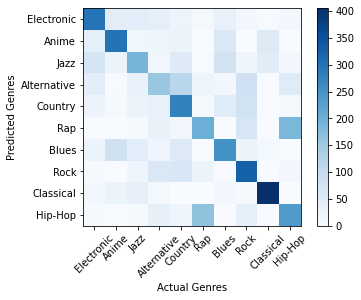

In [212]:
plt.imshow(confMatrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(genres))
plt.xticks(tick_marks, genres, rotation=45)
plt.yticks(tick_marks, genres)
plt.xlabel("Actual Genres")
plt.ylabel("Predicted Genres")
plt.show()

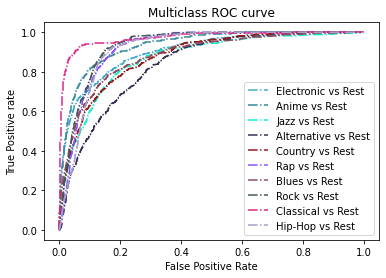

In [213]:
genre_prob = multi_modelNumerical.predict_proba(X_test)

fpr = {}
tpr = {}
thresh ={}
for i in range(len(genres)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_testNumerical, genre_prob[:,i], pos_label=i)


plt.plot(fpr[0], tpr[0], linestyle='-.',color='#44aacc', label=genres[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-.',color='#338899', label=genres[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-.',color='#11eecc', label=genres[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='-.',color='#333355', label=genres[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-.',color='#941818', label=genres[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-.',color='#8c52ff', label=genres[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-.',color='#954d5d', label=genres[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-.',color='#425a55', label=genres[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='-.',color='#e0218a', label=genres[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='-.',color='#aa9fc9', label=genres[9] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [214]:
auc = roc_auc_score(Y_testNumerical,genre_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9051510666666667


35560


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (11.60% inertia)', ylabel='Component 1 (7.82% inertia)'>

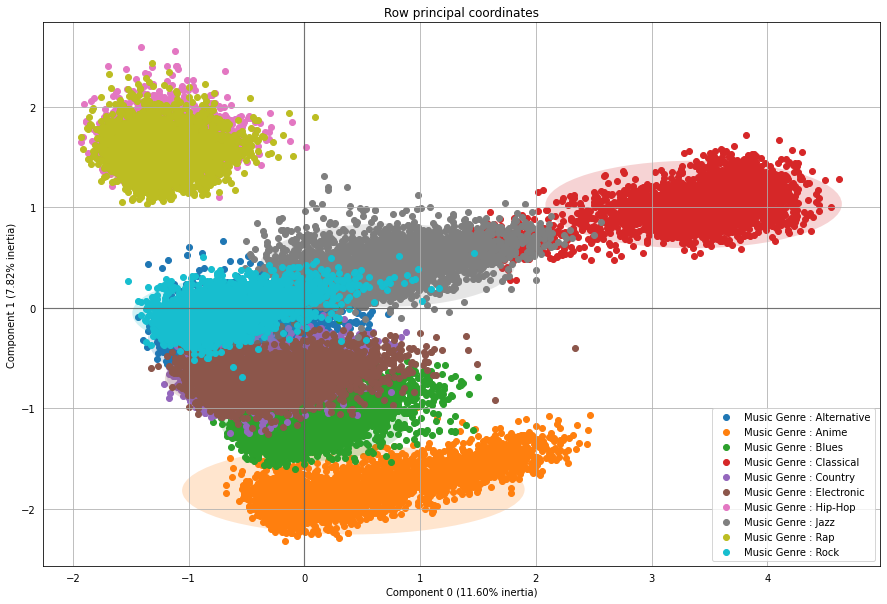

In [215]:
famd = FAMD(n_components=2, n_iter=10, random_state=42)

famd.fit(trainData)
famd.transform(trainData)
famd.plot_row_coordinates(trainData,figsize=(15, 10),color_labels=['Music Genre : {}'.format(t) for t in trainData['music_genre']])

In [216]:
famd.explained_inertia_

array([0.11604873, 0.07818167])

In [217]:
#Seven Clusters
#Rap and Hip-Hop
#Alternative and Rock
#Country and Electronic
#Anime
#Blues
#Jazz
#Classical

In [218]:
def reduced_genres (entry) :
    if entry['music_genre'] == 'Hip-Hop' or entry['music_genre'] == 'Rap':
        return 1
    if entry['music_genre'] == 'Alternative' or entry['music_genre'] == 'Rock':
        return 2
    if entry['music_genre'] == 'Country' or entry['music_genre'] == 'Electronic':
        return 3
    if entry['music_genre'] == 'Anime':
        return 4
    if entry['music_genre'] == 'Jazz':
        return 5
    if entry['music_genre'] == 'Blues':
        return 6
    if entry['music_genre'] == 'Classical':
        return 7

In [219]:
def reduced_genresNumerical (entry) :
    if entry['music_genre'] == 9 or entry['music_genre'] == 5:
        return 1
    if entry['music_genre'] == 3 or entry['music_genre'] == 7:
        return 2
    if entry['music_genre'] == 4 or entry['music_genre'] == 0:
        return 3
    if entry['music_genre'] == 1:
        return 4
    if entry['music_genre'] == 2:
        return 5
    if entry['music_genre'] == 6:
        return 6
    if entry['music_genre'] == 8:
        return 7

In [220]:
trainDataReduced = trainData
trainDataNumericalReduced = trainDataNumerical
testDataReduced = testData
testDataNumericalReduced = testDataNumerical

trainDataReduced['reduced_genre'] = trainData.apply (lambda entry: reduced_genres(entry), axis=1)
trainDataNumericalReduced['reduced_genre'] = trainDataNumerical.apply (lambda entry: reduced_genresNumerical(entry), axis=1)
testDataReduced['reduced_genre'] = testData.apply (lambda entry: reduced_genres(entry), axis=1)
testDataNumericalReduced['reduced_genre'] = testDataNumerical.apply (lambda entry: reduced_genresNumerical(entry), axis=1)

In [221]:
one_hotReduced = pd.get_dummies(trainDataReduced['reduced_genre'], prefix='Genre Grouping', drop_first=True)
one_hotNumericalReduced = pd.get_dummies(trainDataNumericalReduced['reduced_genre'], prefix='Genre Grouping', drop_first=True)

trainDataReduced = trainDataReduced.drop(['reduced_genre'], axis=1)
trainDataNumericalReduced = trainDataNumericalReduced.drop(['reduced_genre'], axis=1)

trainDataReduced = pd.concat([trainDataReduced,one_hotReduced], axis=1)
trainDataNumericalReduced = pd.concat([trainDataNumericalReduced,one_hotNumericalReduced], axis=1)

one_hotTestReduced = pd.get_dummies(testDataReduced['reduced_genre'], prefix='Genre Grouping', drop_first=True)
one_hotTestNumericalReduced = pd.get_dummies(testDataNumericalReduced['reduced_genre'], prefix='Genre Grouping', drop_first=True)

testDataReduced = testDataReduced.drop(['reduced_genre'], axis=1)
testDataNumericalReduced = testDataNumericalReduced.drop(['reduced_genre'], axis=1)

testDataReduced = pd.concat([testDataReduced,one_hotTestReduced], axis=1)
testDataNumericalReduced = pd.concat([testDataNumericalReduced,one_hotTestNumericalReduced], axis=1)

In [222]:
X_trainReduced = trainDataReduced.drop('music_genre', axis=1)
X_testReduced = testDataReduced.drop('music_genre', axis=1)

Y_trainReduced = trainDataReduced['music_genre']
Y_testReduced = testDataReduced['music_genre']

X_trainNumericalReduced = trainDataNumericalReduced.drop('music_genre', axis=1)
X_testNumericalReduced = testDataNumericalReduced.drop('music_genre', axis=1)

Y_trainNumericalReduced = trainDataNumericalReduced['music_genre']
Y_testNumericalReduced = testDataNumericalReduced['music_genre']

In [223]:
cols_to_norm = ['popularity','acousticness','danceability','duration_ms','energy',
                'instrumentalness','liveness','loudness','speechiness','tempo','valence']

X_testReduced[cols_to_norm] = sc.fit_transform(X_testReduced[cols_to_norm])
X_testNumericalReduced[cols_to_norm] = sc.fit_transform(X_testNumericalReduced[cols_to_norm])

In [224]:
reg = 0.1
multi_modelReduced = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42).fit(X_trainReduced, Y_trainReduced)
multi_modelNumericalReduced = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42).fit(X_trainNumericalReduced, Y_trainNumericalReduced)
print(multi_modelReduced)

LogisticRegression(C=10.0, max_iter=1000, random_state=42)


In [225]:
genrePredictionsReduced = multi_modelReduced.predict(X_testReduced)
genrePredictionsNumericalReduced = multi_modelNumericalReduced.predict(X_testNumericalReduced)

print('Predicted genres: ', genrePredictionsReduced[950:1000])
print('Actual genres: ', Y_testReduced[950:1000])

Predicted genres:  ['Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime'
 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime'
 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime'
 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime'
 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime' 'Anime'
 'Anime' 'Anime' 'Anime' 'Anime' 'Anime']
Actual genres:  7868    Anime
8597    Anime
8898    Anime
6854    Anime
6430    Anime
5279    Anime
8458    Anime
6382    Anime
8212    Anime
5426    Anime
6770    Anime
6606    Anime
6574    Anime
9116    Anime
8191    Anime
5592    Anime
8956    Anime
9037    Anime
5096    Anime
8493    Anime
5064    Anime
7771    Anime
9355    Anime
5232    Anime
8904    Anime
5600    Anime
6645    Anime
6808    Anime
6976    Anime
8618    Anime
6799    Anime
5180    Anime
9261    Anime
6019    Anime
5377    Anime
5326    Anime
5637    Anime
8824    Anime
9005    Anime
5086    Anim

In [226]:
print(classification_report(Y_testReduced, genrePredictionsReduced))

print("Overall Accuracy:", accuracy_score(Y_testReduced, genrePredictionsReduced))
print("Overall Precision:", precision_score(Y_testReduced, genrePredictionsReduced, average='macro'))
print("Overall Recall:", recall_score(Y_testReduced, genrePredictionsReduced, average='macro'))

              precision    recall  f1-score   support

 Alternative       0.77      0.80      0.78       500
       Anime       1.00      1.00      1.00       500
       Blues       1.00      1.00      1.00       500
   Classical       1.00      1.00      1.00       500
     Country       0.84      0.91      0.88       500
  Electronic       0.90      0.83      0.86       500
     Hip-Hop       0.56      0.55      0.56       500
        Jazz       1.00      1.00      1.00       500
         Rap       0.56      0.56      0.56       500
        Rock       0.79      0.76      0.78       500

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

Overall Accuracy: 0.842
Overall Precision: 0.8425920769358634
Overall Recall: 0.842


In [227]:
confMatrixReduced = confusion_matrix(Y_testNumericalReduced, genrePredictionsNumericalReduced)
print(confMatrixReduced)

[[414   0   0   0  86   0   0   0   0   0]
 [  0 500   0   0   0   0   0   0   0   0]
 [  0   0 500   0   0   0   0   0   0   0]
 [  0   0   0 399   0   0   0 101   0   0]
 [ 44   0   0   0 456   0   0   0   0   0]
 [  0   0   0   0   0 282   0   0   0 218]
 [  0   0   0   0   0   0 500   0   0   0]
 [  0   0   0 118   0   0   0 382   0   0]
 [  0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0 223   0   0   0 277]]


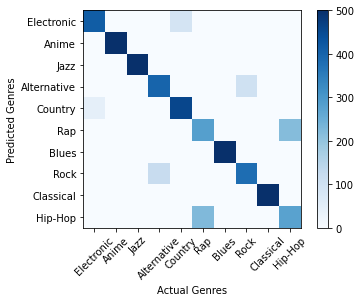

In [228]:
plt.imshow(confMatrixReduced, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(genres))
plt.xticks(tick_marks, genres, rotation=45)
plt.yticks(tick_marks, genres)
plt.xlabel("Actual Genres")
plt.ylabel("Predicted Genres")
plt.show()

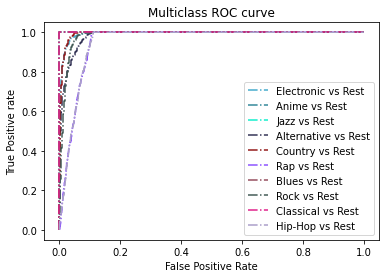

In [229]:
genre_probReduced = multi_modelNumericalReduced.predict_proba(X_testReduced)

fpr = {}
tpr = {}
thresh ={}
for i in range(len(genres)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_testNumericalReduced, genre_probReduced[:,i], pos_label=i)


plt.plot(fpr[0], tpr[0], linestyle='-.',color='#44aacc', label=genres[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-.',color='#338899', label=genres[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-.',color='#11eecc', label=genres[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='-.',color='#333355', label=genres[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-.',color='#941818', label=genres[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-.',color='#8c52ff', label=genres[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-.',color='#954d5d', label=genres[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-.',color='#425a55', label=genres[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='-.',color='#e0218a', label=genres[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='-.',color='#aa9fc9', label=genres[9] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [230]:
auc = roc_auc_score(Y_testNumericalReduced,genre_probReduced, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9865827111111113
